In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [36]:
cars = pd.read_csv("ToyotaCorolla.csv", encoding = 'unicode_escape')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [37]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [42]:
carsn =pd.concat([cars.iloc[:,2:4],cars.iloc[:,6:7],cars.iloc[:,8:9],cars.iloc[:,12:14],cars.iloc[:,15:18]],axis=1)
carsn

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [58]:
carsn =carsn.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'}, axis=1)
carsn

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [51]:
carsn[carsn.duplicated()]

,Price,Age_08_04,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [59]:
carsn2 = carsn.drop_duplicates().reset_index(drop=True)
carsn2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [60]:
carsn2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


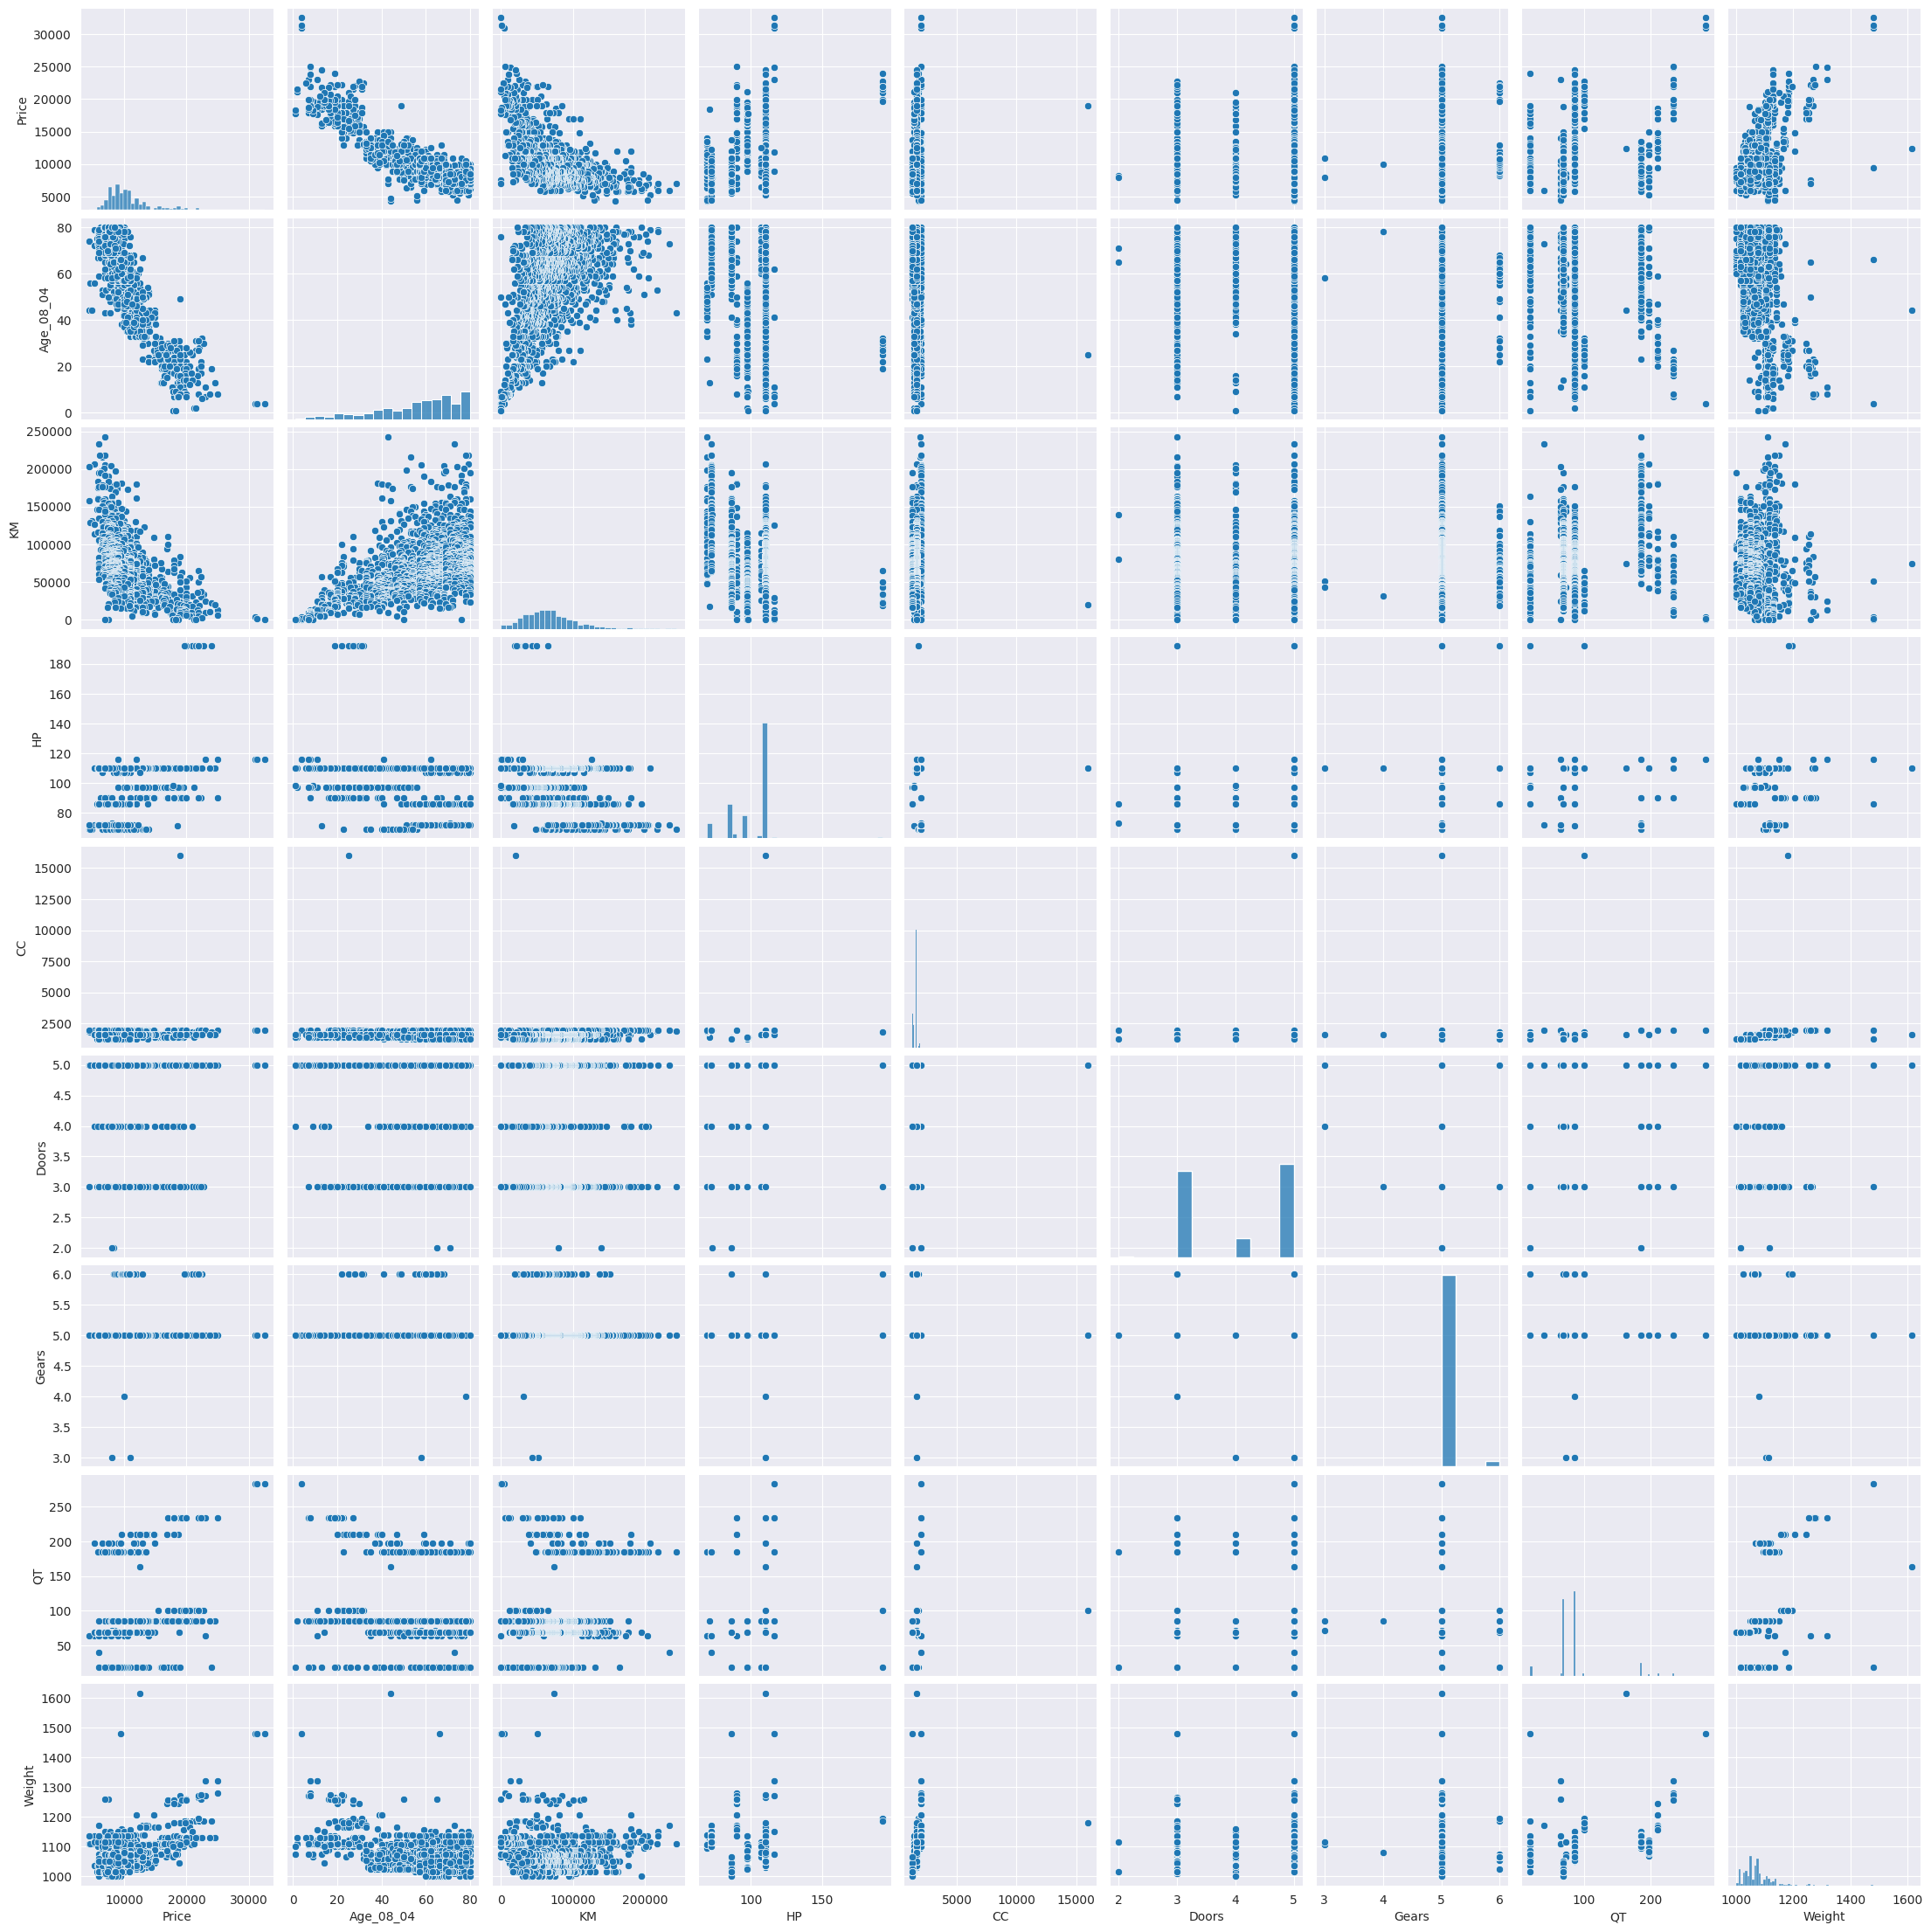

In [55]:
sns.set_style(style='darkgrid')
sns.pairplot(carsn2)

In [61]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=carsn2).fit()

In [62]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [68]:
print('tValues', model.tvalues,'\n','pValues', np.round(model.pvalues,5))

tValues Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 pValues Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [69]:
model.rsquared, model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [76]:
slr_c = smf.ols('Price~CC', data=carsn2).fit()
slr_c.tvalues, slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [72]:
slr_d = smf.ols('Price~Doors', data=carsn2).fit()
slr_d.tvalues, slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [73]:
mlr_cd=smf.ols('Price~CC+Doors',data=carsn2).fit()
mlr_cd.tvalues, mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [80]:
rsq_age =smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=carsn2).fit().rsquared
vif_age =1/(1-rsq_age)

rsq_km =smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=carsn2).fit().rsquared
vif_km =1/(1-rsq_km)

rsq_cc =smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',data=carsn2).fit().rsquared
vif_cc =1/(1-rsq_cc)

rsq_dr =smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',data=carsn2).fit().rsquared
vif_dr =1/(1-rsq_dr)

rsq_gr =smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight',data=carsn2).fit().rsquared
vif_gr =1/(1-rsq_gr)

rsq_qt =smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',data=carsn2).fit().rsquared
vif_qt =1/(1-rsq_qt)

rsq_wt =smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',data=carsn2).fit().rsquared
vif_wt =1/(1-rsq_wt)

d1 = {'Variables' : ['Age', 'KM', 'CC', 'Doors', 'Gears', 'QT', 'WT'],
      'VIF': [vif_age, vif_km, vif_cc, vif_dr, vif_gr, vif_qt, vif_wt]}

vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,CC,1.163470
3,Doors,1.155890
4,Gears,1.098843
5,QT,2.295375
6,WT,2.487180


None of the VIF values is greater than 20, therefore there is no Collinearity. Hence all the variables will be considered in the Regression equation

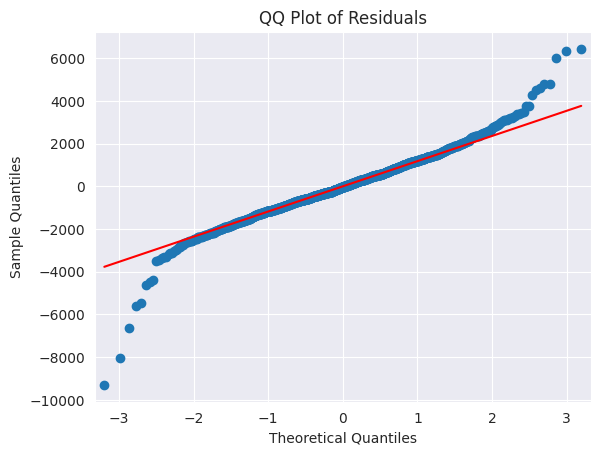

In [81]:
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid, line='q')
plt.title("QQ Plot of Residuals")
plt.show()

In [82]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [84]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [85]:
def get_standardized_values(vals):
  x =(vals-vals.mean())/vals.std()

  return x

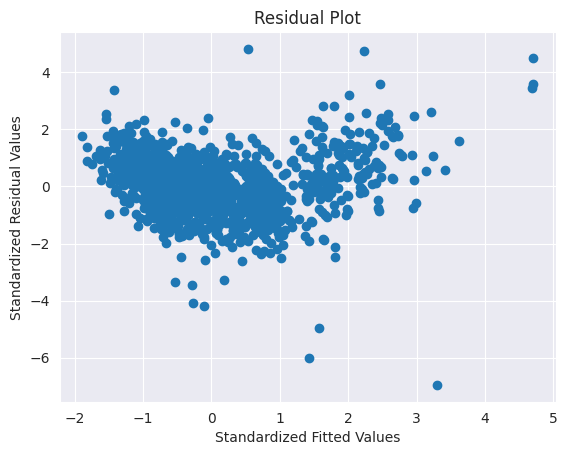

In [86]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel('Standardized Residual Values')
plt.show()

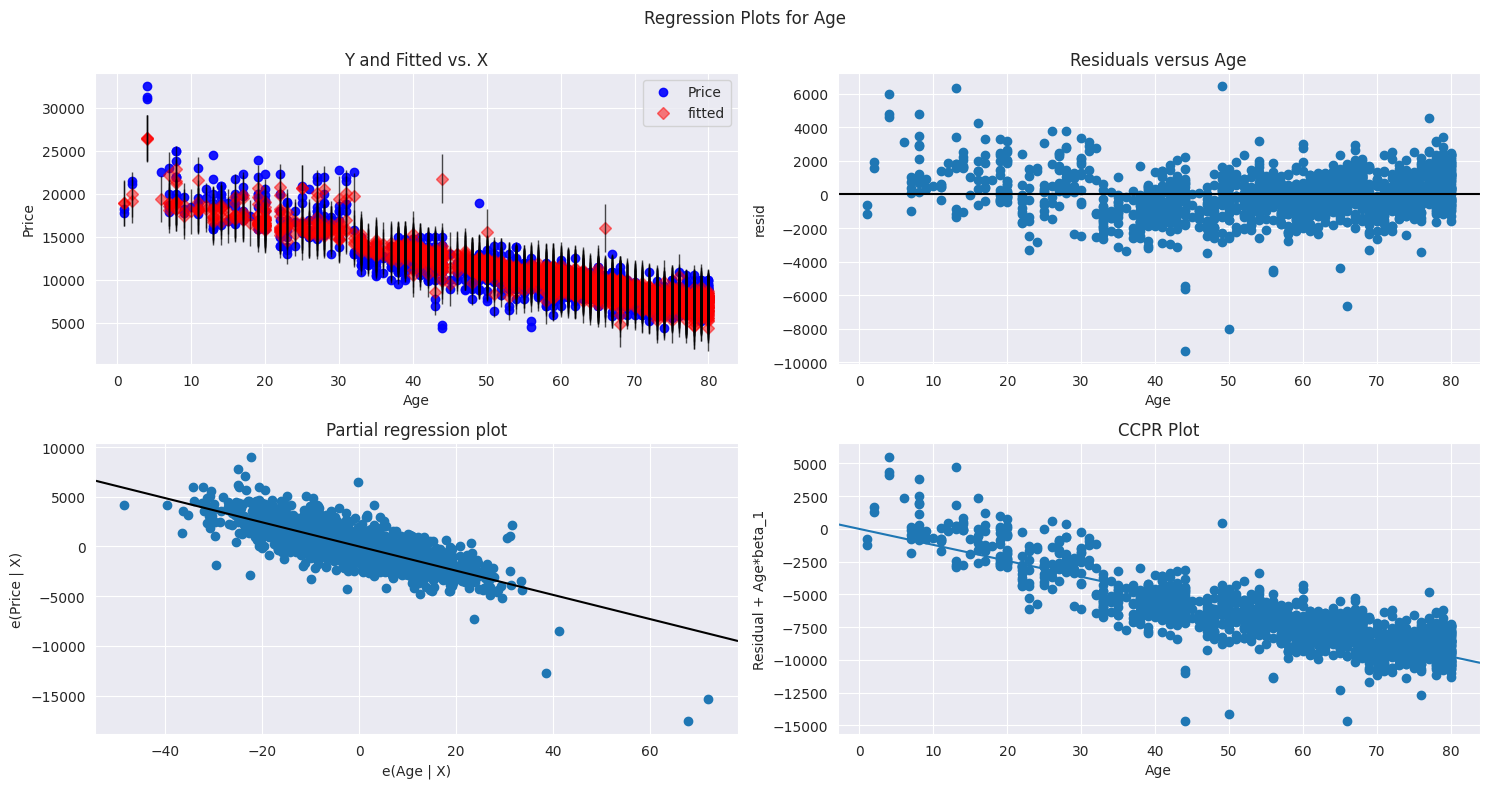

In [87]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

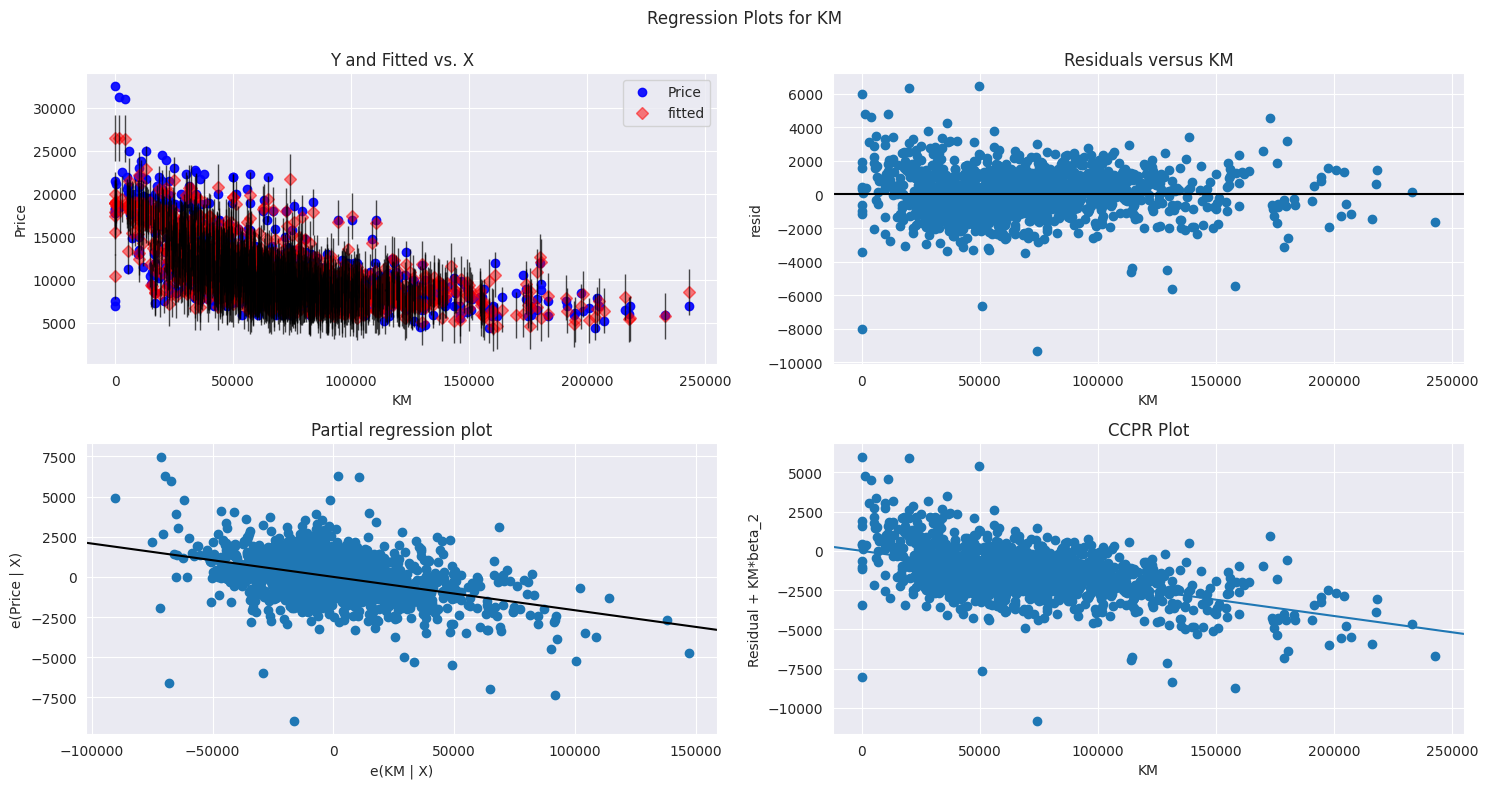

In [88]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

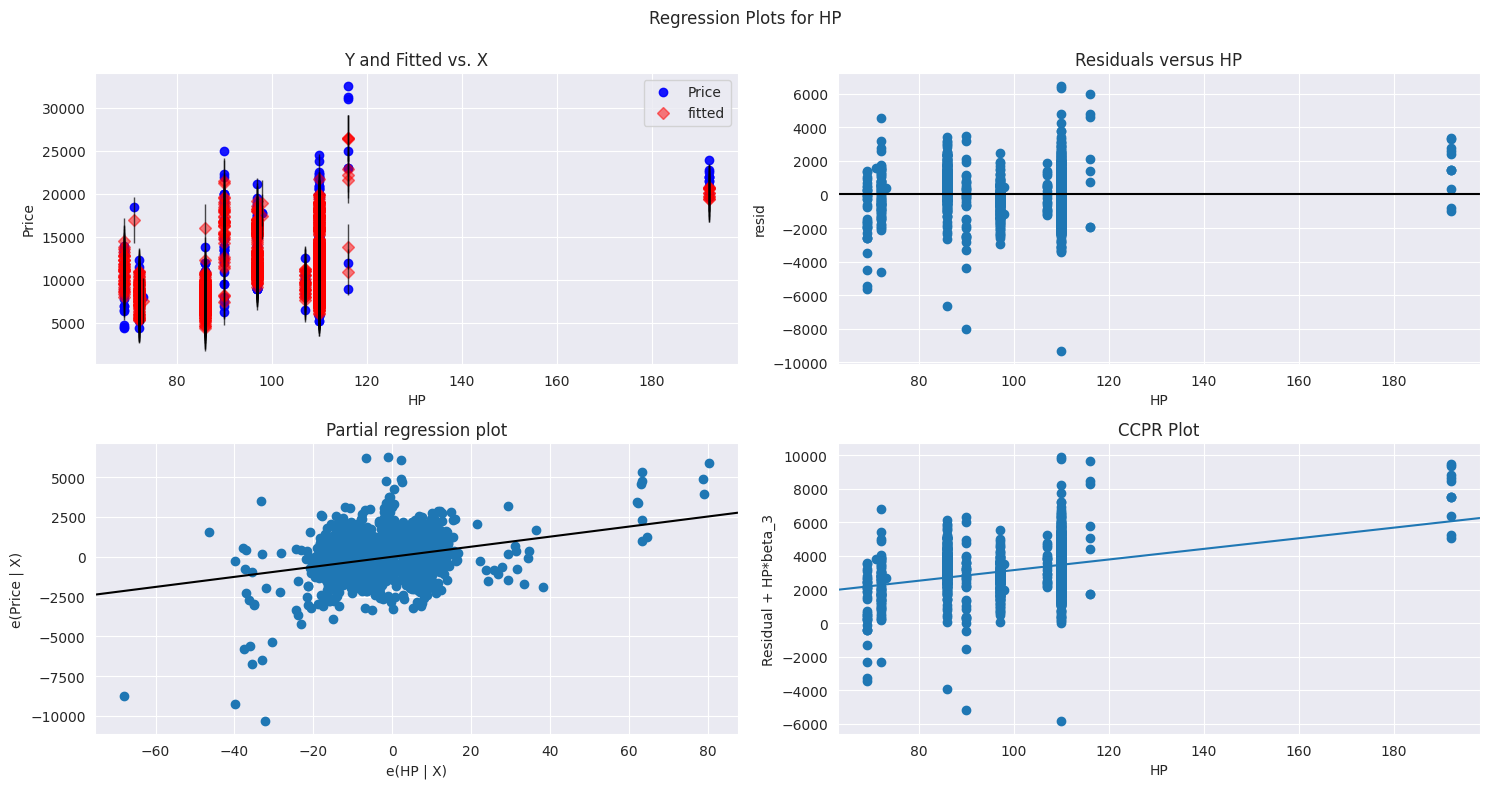

In [89]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

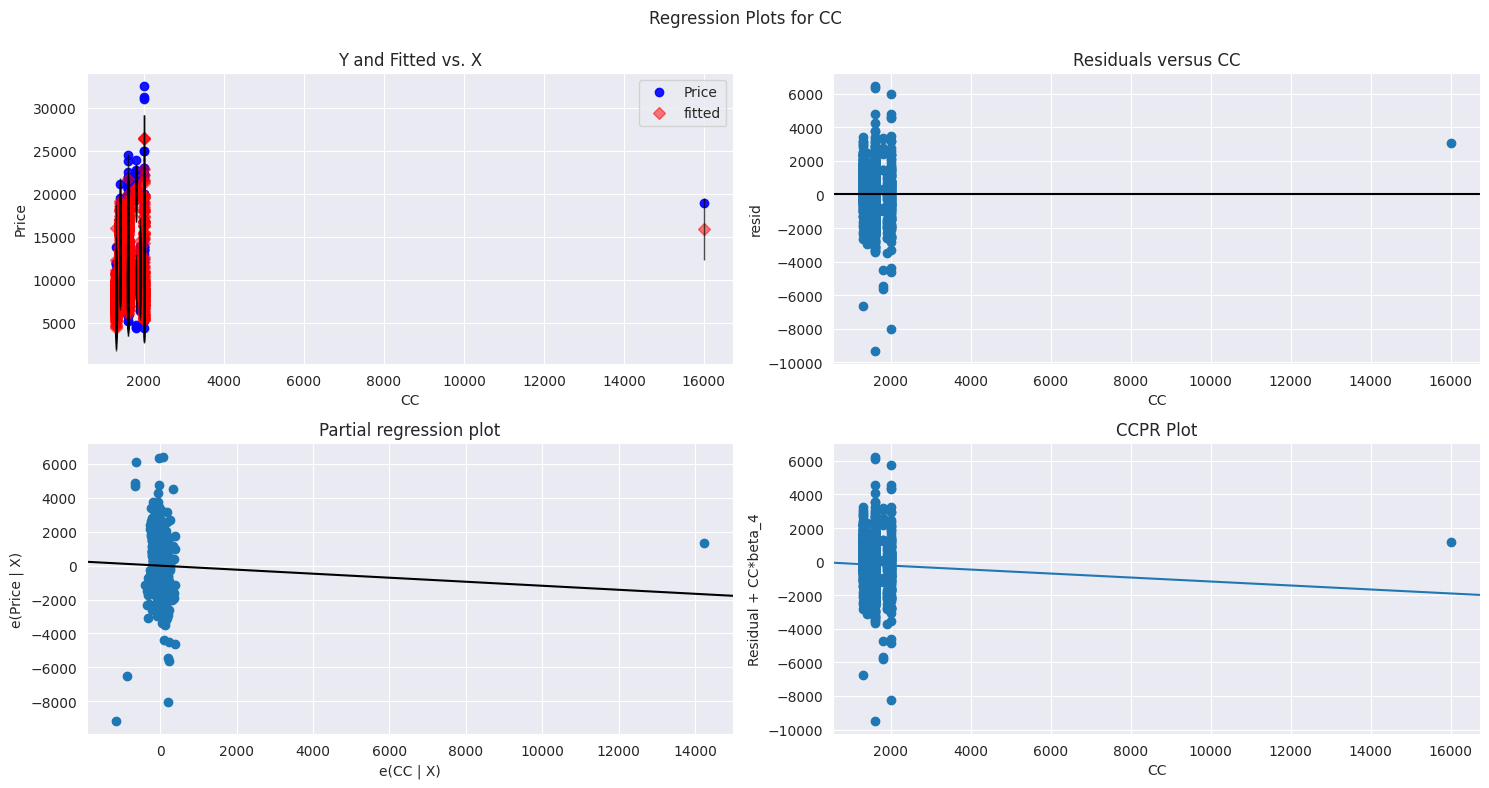

In [90]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

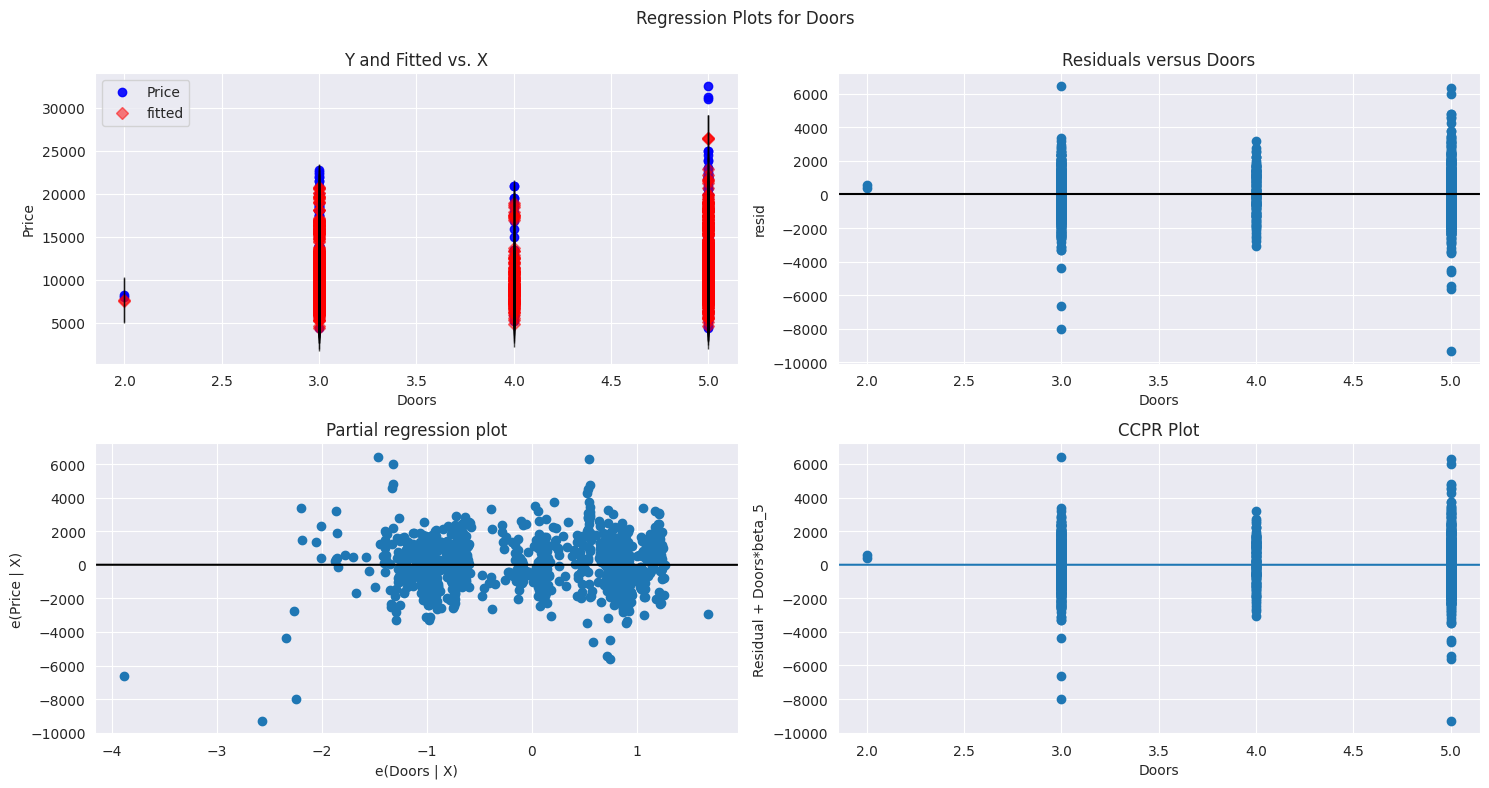

In [91]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

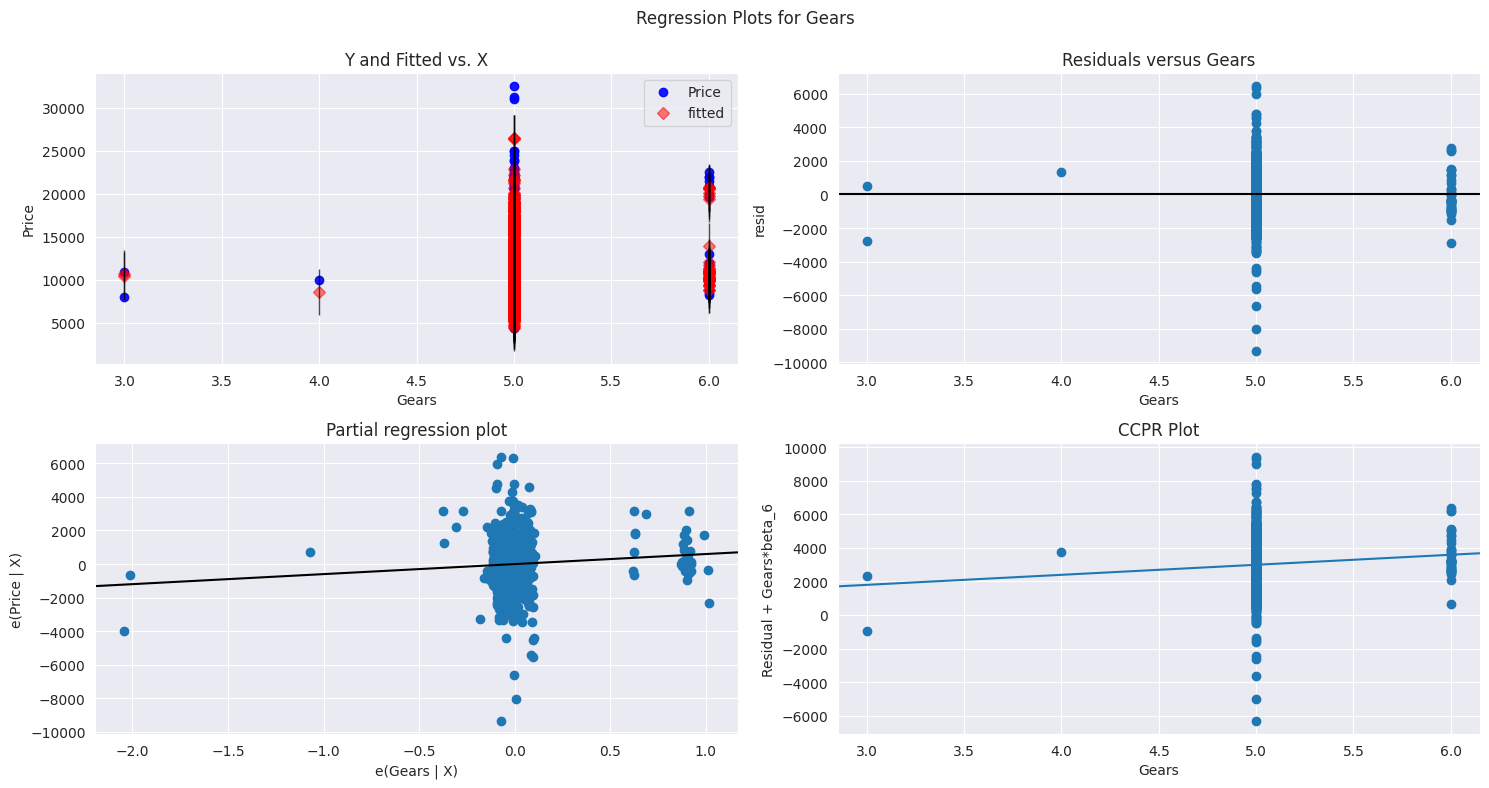

In [92]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

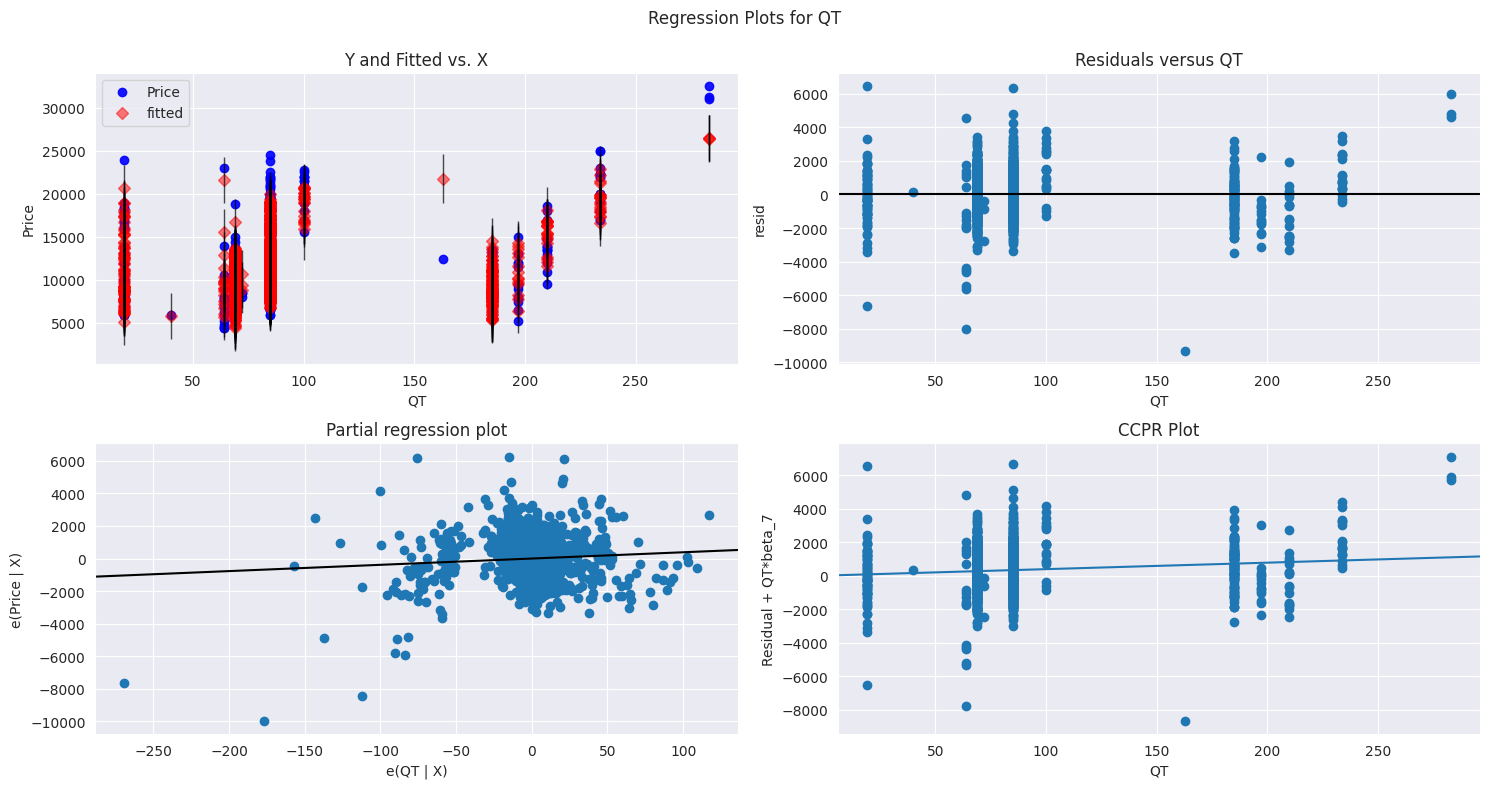

In [93]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

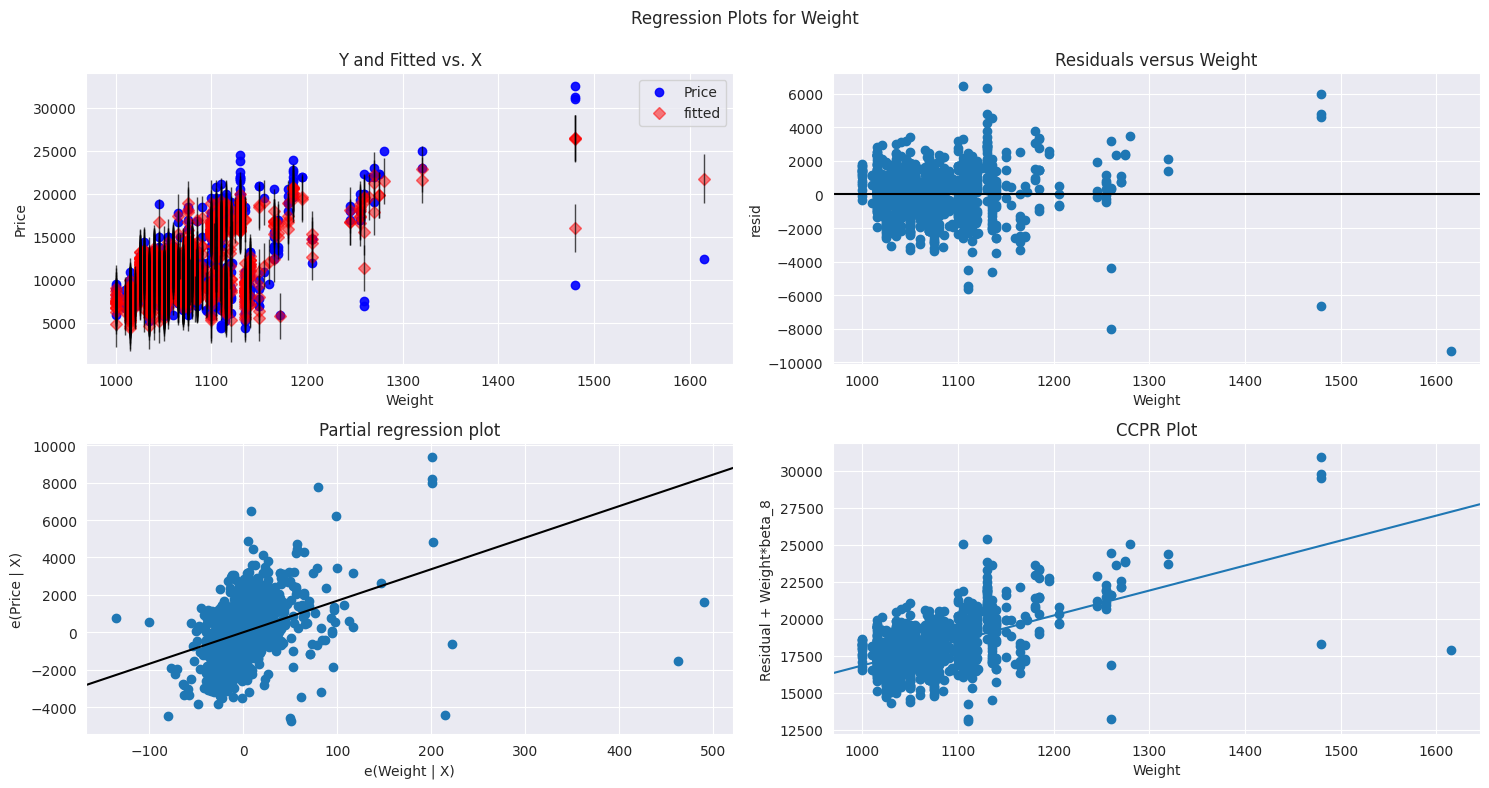

In [94]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

#Model Deletion Diagnostics

In [95]:
# Cook's Distance
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

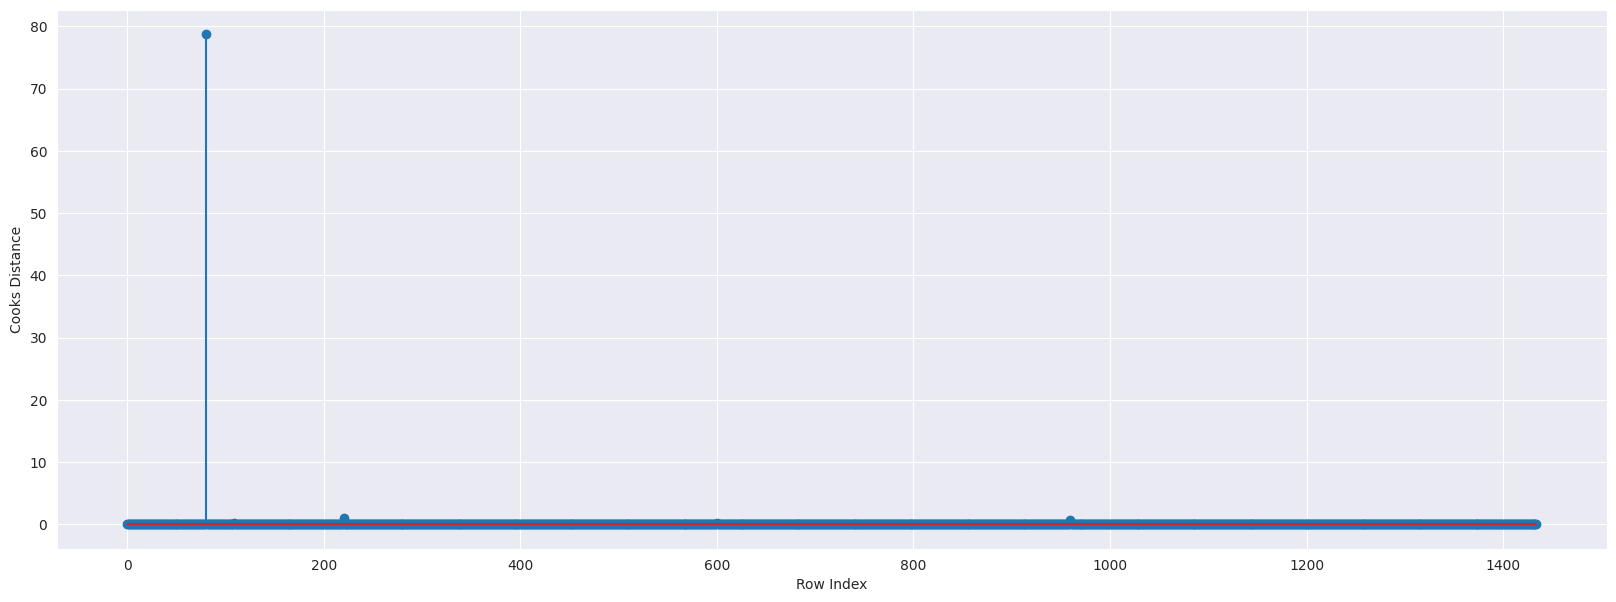

In [96]:
# Plot using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(carsn2)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [97]:
np.argmax(c), np.max(c)

(80, 78.72950582258932)

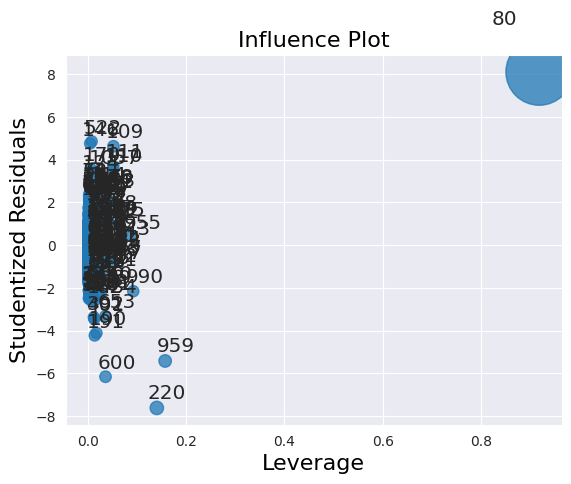

In [98]:
# Using Leverage Value
influence_plot(model)
plt.show()

In [100]:
k=carsn2.shape[1]
n=carsn2.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [101]:
carsn2[carsn2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


#Improving the model

In [102]:
# Creating a copy of Dataset
cars_new =carsn2.copy()
cars_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [103]:
cars_new =cars_new.drop(cars_new.index[[80]], axis=0).reset_index(drop= True)
cars_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [107]:
# Again running Model Deletion Diagnostics
while model.rsquared < 0.90:
  for c in [np.max(c)>0.5]:
    model =smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data=cars_new).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    cars_new = cars_new.drop(cars_new.index[[np.argmax(c)]], axis=0).reset_index(drop=True)
    cars_new

  else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=cars_new).fit()
    final_model.rsquared, final_model.rsquared_adj
    print("Model Accuracy improved to", final_model.rsquared)

Model Accuracy improved to 0.8765926307402282
Model Accuracy improved to 0.8839684606741538
Model Accuracy improved to 0.8882395145171204
Model Accuracy improved to 0.8902571486612915
Model Accuracy improved to 0.8909888960319987
Model Accuracy improved to 0.8922595280462808
Model Accuracy improved to 0.8933621011392295
Model Accuracy improved to 0.8947147371605556
Model Accuracy improved to 0.8955233405057648
Model Accuracy improved to 0.8930210061069088
Model Accuracy improved to 0.8939546425147169
Model Accuracy improved to 0.8954112430715817
Model Accuracy improved to 0.8960182592139027
Model Accuracy improved to 0.8968403506948497
Model Accuracy improved to 0.8964026771830705
Model Accuracy improved to 0.8958538146890626
Model Accuracy improved to 0.8953750500147553
Model Accuracy improved to 0.8949455651565242
Model Accuracy improved to 0.8960864004304144
Model Accuracy improved to 0.8955820765034093
Model Accuracy improved to 0.8930233902806168
Model Accuracy improved to 0.89038

In [108]:
final_model.rsquared

0.9003762532318559

##Model Prediction

In [111]:
new_data =pd.DataFrame({"Age":15, "KM":52000,'HP':120, "CC":1500, "Doors": 4, "Gears":6, "QT":81, "Weight":1811}, index=[1])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
1,15,52000,120,1500,4,6,81,1811


In [112]:
final_model.predict(new_data)

1    43404.433999
dtype: float64